👉 Please upload Mall_Customers.csv from your computer


Saving Mall_Customers.csv to Mall_Customers.csv
✅ File Loaded Successfully!
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


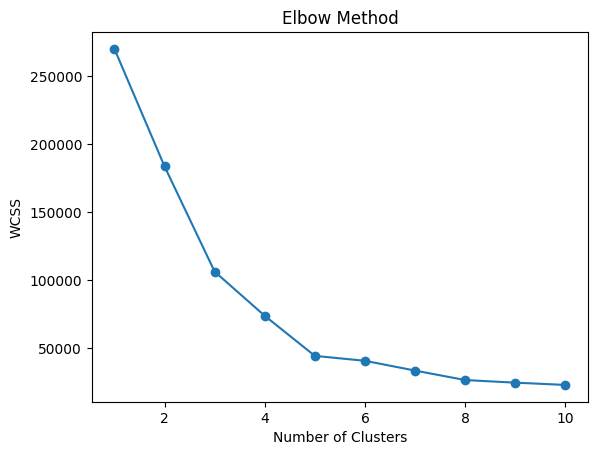

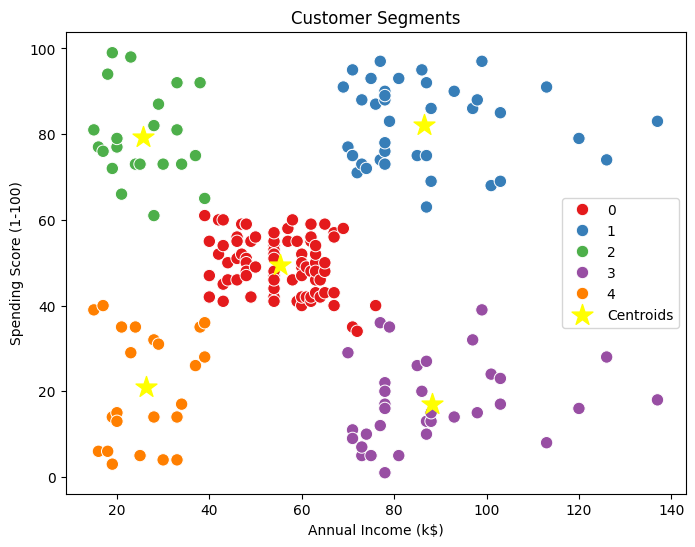

✅ Clustered file saved as Mall_Customers_Clustered.csv


In [4]:
# ==============================
# Step 1: Import Libraries
# ==============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from google.colab import files

# ==============================
# Step 2: Upload the CSV File
# ==============================
print("👉 Please upload Mall_Customers.csv from your computer")
uploaded = files.upload()   # Choose the file from your system

# ==============================
# Step 3: Load Dataset
# ==============================
data = pd.read_csv("Mall_Customers.csv")
print("✅ File Loaded Successfully!")
print(data.head())

# ==============================
# Step 4: Select Features
# ==============================
X = data[["Annual Income (k$)", "Spending Score (1-100)"]]

# ==============================
# Step 5: Elbow Method (to find clusters)
# ==============================
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

# ==============================
# Step 6: Apply KMeans
# ==============================
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add cluster labels to dataset
data["Cluster"] = y_kmeans

# ==============================
# Step 7: Visualize Clusters
# ==============================
plt.figure(figsize=(8,6))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)",
                hue="Cluster", palette="Set1", data=data, s=80)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=250, c="yellow", marker="*", label="Centroids")
plt.title("Customer Segments")
plt.legend()
plt.show()

# ==============================
# Step 8: Save Clustered Data
# ==============================
data.to_csv("Mall_Customers_Clustered.csv", index=False)
print("✅ Clustered file saved as Mall_Customers_Clustered.csv")
